In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv('weather_hourly_agg.csv', parse_dates=['DATE'])
traffic = pd.read_csv('traffic_hourly_agg.csv', parse_dates=['DATE'])

In [3]:
weather.columns = [c.lower() for c in weather.columns]

In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10527 entries, 0 to 10526
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   average_felt_temperature  10527 non-null  float64       
 1   average_road_temperature  10527 non-null  float64       
 2   minimum_felt_temperature  10527 non-null  float64       
 3   date                      10527 non-null  datetime64[ns]
 4   minimum_precipitation     10527 non-null  float64       
 5   maximum_humidity          10527 non-null  float64       
 6   maximum_felt_temperature  10527 non-null  float64       
 7   maximum_precipitation     10527 non-null  float64       
 8   maximum_temperature       10527 non-null  float64       
 9   average_humidity          10527 non-null  float64       
 10  average_wind              10527 non-null  float64       
 11  average_directionofwind   10527 non-null  float64       
 12  minimum_temperatur

In [5]:
traffic.columns = [c.lower() for c in traffic.columns]
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11523 entries, 0 to 11522
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   max_number_of_vehicles  11523 non-null  int64         
 1   minimum_speed           11523 non-null  int64         
 2   min_number_of_vehicles  11523 non-null  int64         
 3   average_speed           11523 non-null  float64       
 4   avg_number_of_vehicles  11523 non-null  float64       
 5   maximum_speed           11523 non-null  int64         
 6   date                    11523 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 630.3 KB


In [6]:
df = pd.merge(traffic, weather, how='inner', on='date').sort_values('date')
df

,max_number_of_vehicles,minimum_speed,min_number_of_vehicles,average_speed,avg_number_of_vehicles,maximum_speed,date,average_felt_temperature,average_road_temperature,minimum_felt_temperature,...,minimum_temperature,average_temperature,maximum_road_temperature,minimum_humidity,minimum_directionofwind,minimum_wind,maximum_directionofwind,minimum_road_temperature,maximum_wind,average_precipitation
0,298,6,11,56.59,58.72,193,2020-01-01 00:00:00,4.00,3.79,-4.22,...,-0.55,4.40,8.0,59.52,0.0,0.0,355.0,-13.2,6.41,1.18
1,272,6,11,57.41,53.68,188,2020-01-01 01:00:00,3.95,3.34,-3.75,...,-0.41,4.36,7.4,57.21,1.0,0.0,354.0,-37.1,6.00,0.23
2,223,3,11,59.70,44.72,197,2020-01-01 02:00:00,4.11,4.08,-1.24,...,1.15,4.38,7.2,52.10,0.0,0.0,355.0,1.8,5.39,0.93
3,166,6,11,61.05,37.51,191,2020-01-01 03:00:00,4.26,4.23,0.39,...,2.12,4.36,6.6,54.88,0.0,0.0,355.0,2.7,5.01,0.62
4,113,6,11,62.44,32.87,207,2020-01-01 04:00:00,4.92,4.56,0.58,...,2.34,4.65,6.7,56.46,0.0,0.0,355.0,2.9,3.97,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10318,780,1,11,49.27,107.00,202,2021-04-28 13:00:00,17.57,22.08,10.96,...,12.08,17.01,40.3,0.88,1.0,0.0,355.0,-1.9,7.65,0.88
10319,637,1,11,48.46,88.08,195,2021-04-28 14:00:00,16.78,20.58,11.15,...,11.17,16.28,36.3,0.88,0.0,0.0,356.0,-1.9,7.49,2.57
10320,552,1,11,48.28,83.62,200,2021-04-28 15:00:00,15.42,18.33,9.38,...,10.36,15.11,31.6,0.88,0.0,0.0,355.0,-1.9,8.05,2.48
10321,522,1,11,47.41,74.22,197,2021-04-28 16:00:00,14.49,16.71,7.96,...,9.69,14.27,27.2,0.88,0.0,0.0,355.0,-1.9,10.37,2.49


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
max_number_of_vehicles,10323.0,564.932481,318.729129,11.00,270.000,533.00,857.000,1351.00
minimum_speed,10323.0,3.312990,2.257879,0.00,1.000,3.00,6.000,38.00
min_number_of_vehicles,10323.0,11.000000,0.000000,11.00,11.000,11.00,11.000,11.00
average_speed,10323.0,57.749718,5.323657,32.22,53.590,57.06,60.815,77.42
avg_number_of_vehicles,10323.0,82.577765,34.298380,11.00,50.320,85.43,111.710,167.80
maximum_speed,10323.0,195.445607,15.679680,84.00,186.000,195.00,204.000,255.00
average_felt_temperature,10323.0,14.083199,8.268232,-5.48,7.380,12.94,21.410,33.79
average_road_temperature,10323.0,17.588540,11.100819,-26.18,9.100,14.61,24.890,53.45
minimum_felt_temperature,10323.0,8.992021,8.518939,-13.47,2.450,7.93,16.225,27.65
minimum_precipitation,10323.0,0.000068,0.004017,0.00,0.000,0.00,0.000,0.34


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='date'>

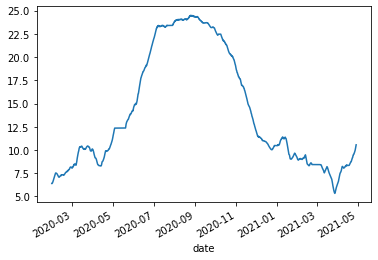

In [9]:
#Observe monthly trend
df.set_index('date')['average_temperature'].rolling(24*30).mean().plot()

<AxesSubplot:xlabel='date'>

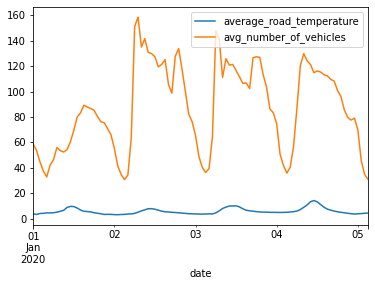

In [10]:
df.set_index('date')[:100][['average_road_temperature', 'avg_number_of_vehicles']].plot()

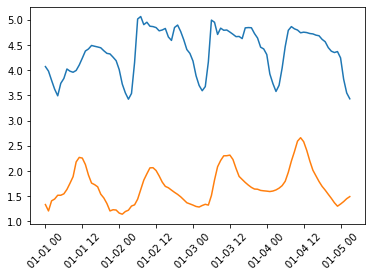

In [11]:
plt.plot(np.log(df.set_index('date')[:100]['avg_number_of_vehicles']))
plt.plot(np.log(df.set_index('date')[:100]['average_road_temperature']))
plt.xticks(rotation=45)
plt.show()

In [12]:
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour

<AxesSubplot:xlabel='hour'>

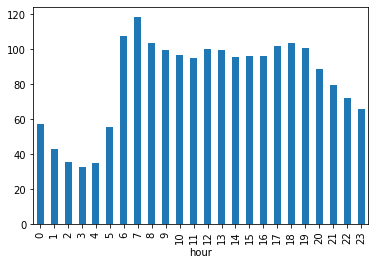

In [13]:
df.groupby('hour').avg_number_of_vehicles.mean().plot(kind='bar')

<AxesSubplot:xlabel='dayofweek'>

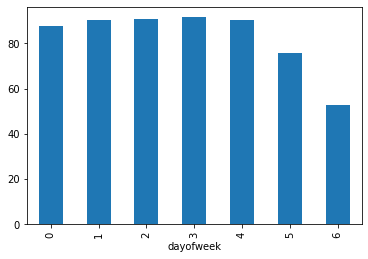

In [14]:
df.groupby('dayofweek').avg_number_of_vehicles.mean().plot(kind='bar')

In [15]:
df.groupby(['dayofweek','hour']).avg_number_of_vehicles.mean()

dayofweek  hour
0          0       51.543226
           1       41.520968
           2       35.451452
           3       32.311935
           4       35.250000
                     ...    
6          19      60.421587
           20      58.346667
           21      61.922742
           22      60.218871
           23      58.974667
Name: avg_number_of_vehicles, Length: 168, dtype: float64

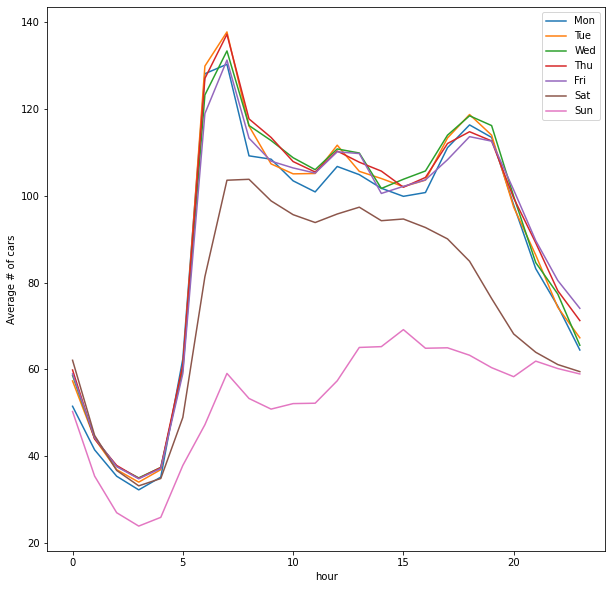

In [16]:
plt.figure(figsize=(10,10))
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i, dayname in enumerate(days):
    df.groupby(['dayofweek','hour']).avg_number_of_vehicles.mean()[i].plot(label=dayname)
plt.ylabel('Average # of cars')
plt.legend()
plt.show();

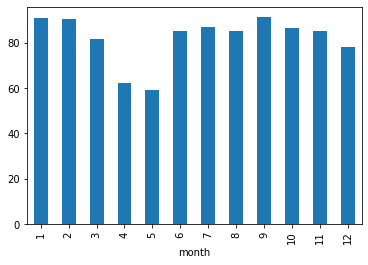

In [17]:
df.query('date < 2021').groupby('month').avg_number_of_vehicles.mean().plot(kind='bar')
plt.show()

### Time Series Prediction

In [18]:
df.columns

Index(['max_number_of_vehicles', 'minimum_speed', 'min_number_of_vehicles',
       'average_speed', 'avg_number_of_vehicles', 'maximum_speed', 'date',
       'average_felt_temperature', 'average_road_temperature',
       'minimum_felt_temperature', 'minimum_precipitation', 'maximum_humidity',
       'maximum_felt_temperature', 'maximum_precipitation',
       'maximum_temperature', 'average_humidity', 'average_wind',
       'average_directionofwind', 'minimum_temperature', 'average_temperature',
       'maximum_road_temperature', 'minimum_humidity',
       'minimum_directionofwind', 'minimum_wind', 'maximum_directionofwind',
       'minimum_road_temperature', 'maximum_wind', 'average_precipitation',
       'month', 'dayofweek', 'hour'],
      dtype='object')

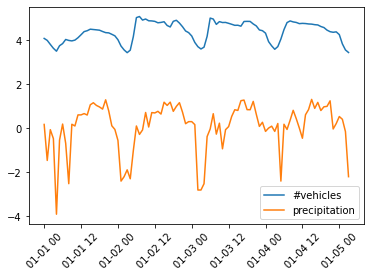

In [19]:
plt.plot(np.log(df.set_index('date')[:100]['avg_number_of_vehicles']))
plt.plot(np.log(df.set_index('date')[:100]['average_precipitation']))
plt.xticks(rotation=45)
plt.legend(['#vehicles','precipitation'])
plt.show()

In [20]:
ts = df.set_index('date').copy()
ts.interpolate(inplace=True)

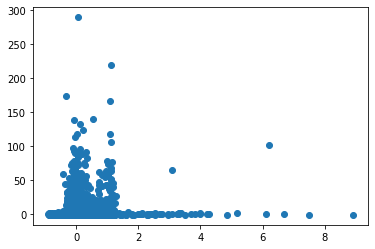

In [21]:
num_veh_change = ts['avg_number_of_vehicles'].pct_change()
avg_precip = ts['average_precipitation'].pct_change()
num_veh_change.shape, avg_precip.shape
plt.scatter(num_veh_change, avg_precip);

# ARIMA MODEL

* https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
* p --> Order of AR (autoregressive term) -number of lags to be used as predictors for regression
* q --> Order of MA (moving average term) -
* d --> Order of Differencing (to make the series stationary)

### Check if Stationary

* Mean and variance seems to change over time

In [25]:
veh = df['avg_number_of_vehicles']

<AxesSubplot:xlabel='date'>

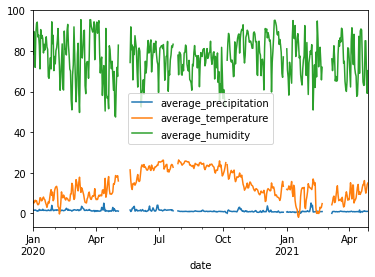

In [26]:
df[['date', 'average_precipitation', 'average_temperature', 'average_humidity']].set_index('date').resample(rule='D').mean().plot()

In [27]:
veh.shape

(10323,)

In [34]:
veh = df[['date', 'avg_number_of_vehicles']].set_index('date').loc['2020-01':'2020-03']

In [35]:
veh

,avg_number_of_vehicles
date,
2020-01-01 00:00:00,58.72
2020-01-01 01:00:00,53.68
2020-01-01 02:00:00,44.72
2020-01-01 03:00:00,37.51
2020-01-01 04:00:00,32.87
...,...
2020-03-31 19:00:00,82.53
2020-03-31 20:00:00,61.68
2020-03-31 21:00:00,55.08


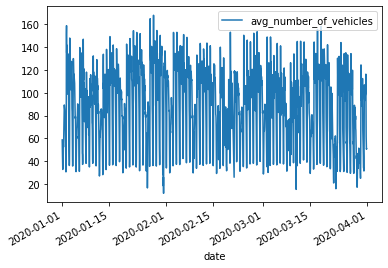

In [36]:
veh.plot();

In [41]:
full_range = set(pd.date_range('2020-01-01 00:00', '2020-03-31 00:00:00', freq='H'))
veh_dates = set(veh.index.tolist())
missing_days = full_range.difference(veh_dates)
missing_days = pd.Series(list(missing_days)).sort_values().reset_index(drop=True)
missing_days.values

array(['2020-01-26T09:00:00.000000000', '2020-01-26T12:00:00.000000000',
       '2020-01-27T11:00:00.000000000', '2020-01-31T08:00:00.000000000',
       '2020-02-13T12:00:00.000000000', '2020-02-20T19:00:00.000000000',
       '2020-02-20T20:00:00.000000000', '2020-02-20T21:00:00.000000000',
       '2020-02-20T22:00:00.000000000', '2020-02-20T23:00:00.000000000',
       '2020-02-21T00:00:00.000000000', '2020-02-21T01:00:00.000000000',
       '2020-02-21T02:00:00.000000000', '2020-02-21T03:00:00.000000000',
       '2020-02-21T04:00:00.000000000', '2020-02-21T05:00:00.000000000',
       '2020-02-21T06:00:00.000000000', '2020-02-21T07:00:00.000000000',
       '2020-02-21T08:00:00.000000000', '2020-03-10T21:00:00.000000000'],
      dtype='datetime64[ns]')

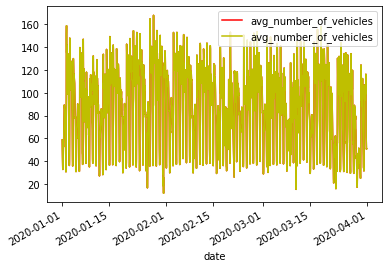

In [42]:
veh2 = veh.interpolate()
ax = veh2.plot(c='r')
veh.plot(c='y', ax=ax)
plt.title
plt.show()

In [30]:
veh = veh.interpolate()

In [43]:
veh.iloc[int(len(veh)*0.95)]

avg_number_of_vehicles    98.37
Name: 2020-03-27 11:00:00, dtype: float64

In [45]:
X = veh.loc['2020-01-01':'2020-03-27 11:00:00']
y = veh.loc['2020-03-27 11:00:00':]

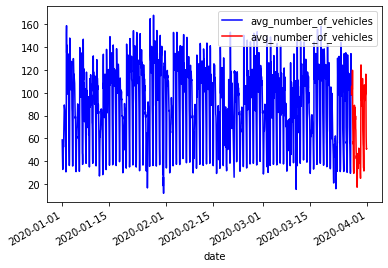

In [46]:
ax = X.plot(c='b')
y.plot(c='r', ax=ax)
plt.title
plt.show()

In [47]:
#Test if stationary (Dicky Fuller test) - h0: Time series data is not stationary
from statsmodels.tsa.stattools import adfuller
results = adfuller(X)

In [48]:
print("h0: Time series data is not stationary")
print(f"Test Statistic: {results[0]}\nP-Value: {results[1]}\nCritical Test stats for intervals: {results[4]}\n")

h0: Time series data is not stationary
Test Statistic: -6.354337760490652
P-Value: 2.5647673078933555e-08
Critical Test stats for intervals: {'1%': -3.433577004601062, '5%': -2.862965528076955, '10%': -2.5675288883320975}



In [51]:
from pmdarima.arima.utils import ndiffs
ndiffs(X, test='adf')

0

C:\Users\TCLSOYKAN\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


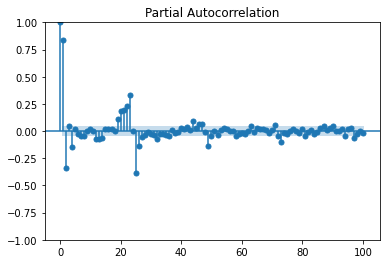

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(X.dropna(), lags=100);

In [56]:
ser = X.dropna().iloc[:,0]
ar0 = ser.corr(ser)
ar1 = ser.corr(ser.shift().dropna())
ar2 = ser.corr(ser.shift().shift().dropna())
ar0, ar1, ar2

(1.0, 0.8384244511430154, 0.6034712097159749)

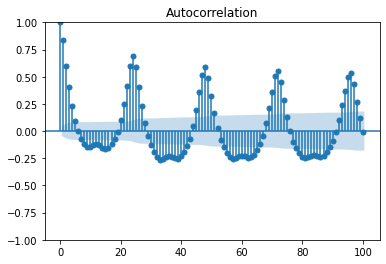

In [57]:
plot_acf(X.dropna().reset_index(drop=True), lags=100);

In [44]:
from statsmodels.tsa.arima.model import ARIMA

In [45]:
model = ARIMA(X, order=(2,1,2))
model = model.fit()
print(model.summary())

                                SARIMAX Results                                
Dep. Variable:     average_temperature   No. Observations:                  460
Model:                  ARIMA(2, 1, 2)   Log Likelihood                -944.476
Date:                 Wed, 06 Apr 2022   AIC                           1898.951
Time:                         22:44:21   BIC                           1919.597
Sample:                     01-01-2020   HQIC                          1907.082
                          - 04-04-2021                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6949      0.140      4.976      0.000       0.421       0.969
ar.L2         -0.0473      0.138     -0.343      0.731      -0.317       0.223
ma.L1         -0.6054      0.139     -4.364 

C:\Users\TCLSOYKAN\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [46]:
forecast = model.get_forecast(len(y))
fc = forecast.predicted_mean
conf = forecast.conf_int(alpha=0.05)

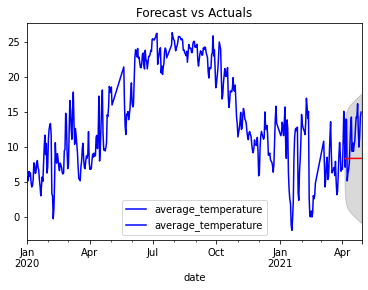

In [47]:
ax = X.plot(c='b')
y.plot(c='b', ax=ax)
fc.plot(c='r', ax=ax)
plt.fill_between(y.index, conf.iloc[:,0], conf.iloc[:,1], 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.show()

In [48]:
fc

2021-04-05    8.326571
2021-04-06    8.226200
2021-04-07    8.256274
2021-04-08    8.281923
2021-04-09    8.298323
2021-04-10    8.308506
2021-04-11    8.314805
2021-04-12    8.318701
2021-04-13    8.321111
2021-04-14    8.322600
2021-04-15    8.323522
2021-04-16    8.324091
2021-04-17    8.324444
2021-04-18    8.324661
2021-04-19    8.324796
2021-04-20    8.324879
2021-04-21    8.324931
2021-04-22    8.324963
2021-04-23    8.324982
2021-04-24    8.324995
2021-04-25    8.325002
2021-04-26    8.325007
2021-04-27    8.325010
2021-04-28    8.325011
2021-04-29    8.325013
Freq: D, Name: predicted_mean, dtype: float64

## DECOMPOSITION

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [50]:
results = seasonal_decompose(X,period=180)

<Figure size 500x500 with 0 Axes>

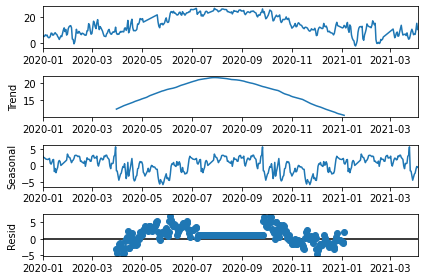

In [51]:
plt.figure(figsize=(100,100), dpi=5)
results.plot();

In [52]:
y.values

array([[10.43608696],
       [ 7.07      ],
       [13.93666667],
       [13.91083333],
       [ 5.1025    ],
       [ 6.22375   ],
       [ 6.72826087],
       [ 7.62916667],
       [10.35625   ],
       [12.97333333],
       [14.23916667],
       [ 9.35      ],
       [10.538     ],
       [ 9.3375    ],
       [10.26041667],
       [10.8575    ],
       [12.79857143],
       [14.25888889],
       [14.17166667],
       [16.14625   ],
       [12.34666667],
       [ 9.94458333],
       [11.52083333],
       [14.18708333],
       [14.94555556]])

https://app.datacamp.com/learn/courses/time-series-analysis-in-python

In [53]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                  # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, y.iloc[:,0].values)

C:\Users\TCLSOY~1\AppData\Local\Temp/ipykernel_15044/937722734.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
C:\Users\TCLSOY~1\AppData\Local\Temp/ipykernel_15044/937722734.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.3028320460545181,
 'me': -2.8569284006995703,
 'mae': 3.5539569868269627,
 'mpe': -0.18675099460571015,
 'rmse': 4.113303356485607,
 'acf1': 0.4603079560946989,
 'corr': 0.22715698784642616,
 'minmax': 0.286802925447149}

### Auto Selection of ARIMA components 

In [55]:
import pmdarima as pm

In [56]:
automodel = pm.auto_arima(X, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(automodel.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1948.177, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1942.435, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1938.067, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1946.189, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1934.052, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1901.275, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1924.133, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1901.534, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1900.923, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1899.017, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1925.120, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1900.942, Time=0.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1914.073, Time=0.07 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

<AxesSubplot:xlabel='date'>

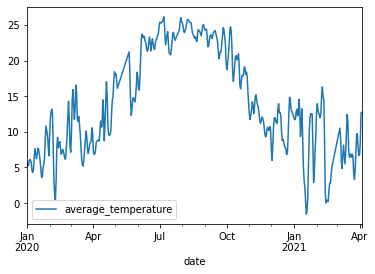

In [75]:
X.rolling('2d').mean().plot()

In [71]:
X.rolling('5d').mean()

,average_temperature
date,
2020-01-01,5.669583
2020-01-02,5.368750
2020-01-03,5.393889
2020-01-04,5.660312
2020-01-05,5.687000
...,...
2021-03-31,8.332667
2021-04-01,7.923558
2021-04-02,7.851725


In [72]:
X

,average_temperature
date,
2020-01-01,5.669583
2020-01-02,5.067917
2020-01-03,5.444167
2020-01-04,6.459583
2020-01-05,5.793750
...,...
2021-03-31,6.880417
2021-04-01,6.746957
2021-04-02,10.245833
